# Ejercicio - Busqueda de Alojamiento en Airbnb

In [7]:
import pandas as pd
data = pd.read_csv("./src/pandas/airbnb.csv")

## CASO 01

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [8]:
filtro = data[data['reviews']>10]
filtro = filtro[filtro["overall_satisfaction"]>=4]
filtro = filtro[filtro["bedrooms"] == 2]
filtro = filtro.sort_values('overall_satisfaction', ascending = False)
filtro.head(3)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
4627,7222452,36161241,Entire home/apt,Misericórdia,45,5.0,4,2.0,113.0
5538,9135994,34592928,Entire home/apt,Santa Maria Maior,42,5.0,4,2.0,80.0
5562,9193166,26494184,Entire home/apt,Santo António,36,5.0,4,2.0,85.0


## CASO 02

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387 respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [9]:
roberto = data[data['room_id'].isin([97503,90387])]
roberto.head()
roberto.to_excel('roberto.xlsx', sheet_name='roberto')

## CASO 03

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas (room_type == Shared room), y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [10]:
diana = data[data['room_type'] == 'Shared room']
diana = diana[diana['overall_satisfaction']>4]
diana = diana.sort_values(by = ['price','overall_satisfaction'],ascending = [True,False])
diana = diana.head(10)
diana

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
9065,14933182,91501272,Shared room,Santo António,5,5.0,8,1.0,11.0
4353,6728244,28812904,Shared room,Santa Maria Maior,8,4.5,1,1.0,11.0
5616,9317561,48360716,Shared room,Arroios,13,4.5,4,1.0,11.0
6640,11693356,28812904,Shared room,Santa Maria Maior,3,4.5,1,1.0,11.0
6641,11693442,28812904,Shared room,Santa Maria Maior,16,4.5,1,1.0,11.0
8908,14708916,91501272,Shared room,Santo António,18,4.5,4,1.0,11.0
9061,14932515,91501272,Shared room,Santo António,9,4.5,4,1.0,11.0
9062,14932518,91501272,Shared room,Santo António,7,4.5,4,1.0,11.0
11789,18154378,124601372,Shared room,Santo António,4,4.5,4,1.0,11.0
6058,10398958,32344156,Shared room,Misericórdia,39,4.5,8,1.0,12.0


# USANDO MATPLOT

room_type
Entire home/apt    9764
Private room       3297
Shared room         171
Name: room_type, dtype: int64


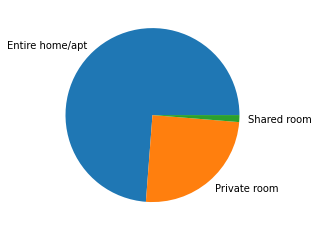

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data.groupby('room_type')['room_type'].count().plot(kind='pie')
plt.ylabel('')
a = data.groupby('room_type')['room_type'].count()
print(a)

<AxesSubplot:>

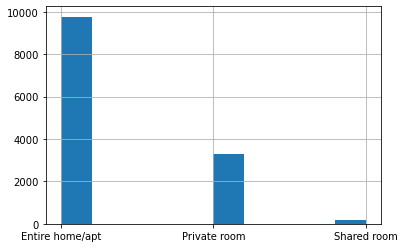

In [12]:
room=data.loc[:,'room_type']
room.hist()